#### Task1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from mpl_toolkits.mplot3d import Axes3D

In [7]:
# Load data set
med = pd.read_csv('DS1_C9_S3_Practice_MedicalPremium_Data.csv')
med_df=med
med_df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [9]:
# data description
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [11]:
med_df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


#### Task2

In [15]:
# a) missing value
med_df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

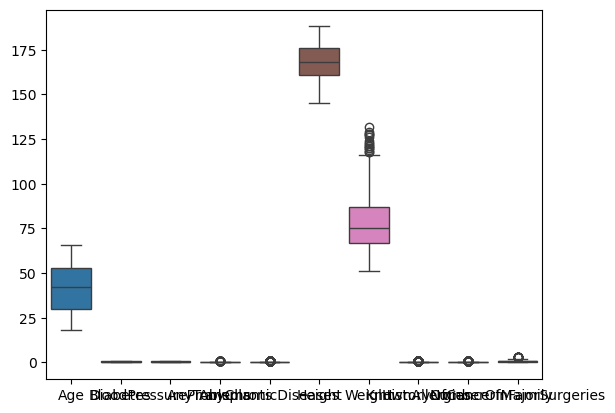

In [21]:
med1=med_df.loc[:,med_df.columns!='PremiumPrice']
sns.boxplot(data=med1)
plt.gcf().set_size_inches(20,6)
plt.show()

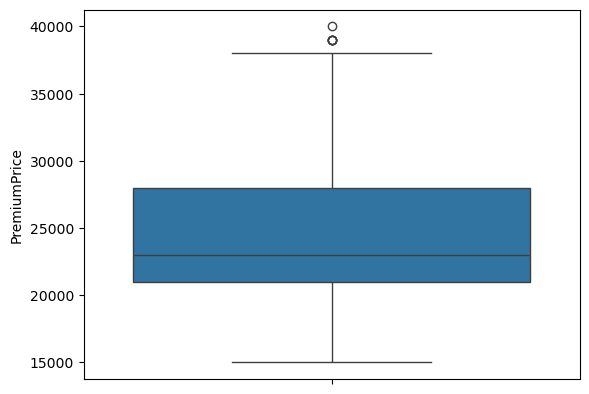

In [23]:
sns.boxplot(data=med_df['PremiumPrice'])
plt.show()

In [25]:
# b) outlier treatment
for col in med_df.columns:
    ser=pd.Series(med_df[col])
    q1=ser.quantile(0.25)
    q3=ser.quantile(0.75)
    iqr=q3-q1
    lf=q1-1.5*iqr
    uf=q3+1.5*iqr
    for z in ser:
        if z > uf:
            med_df[col]=med_df[col].replace(to_replace=z,value=uf)
        elif z < lf:
            med_df[col]=med_df[col].replace(to_replace=z,value=lf)
        

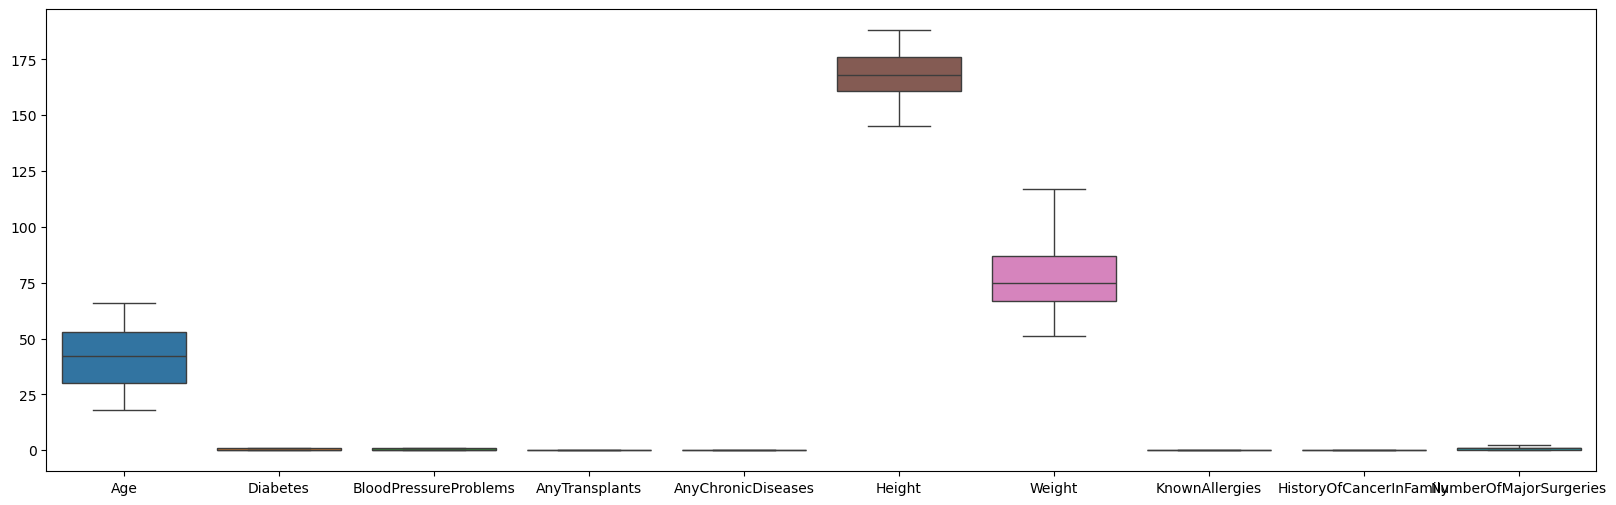

In [31]:
med1=med_df.loc[:,med_df.columns!='PremiumPrice']
sns.boxplot(data=med1)
plt.gcf().set_size_inches(20,6)
plt.show()

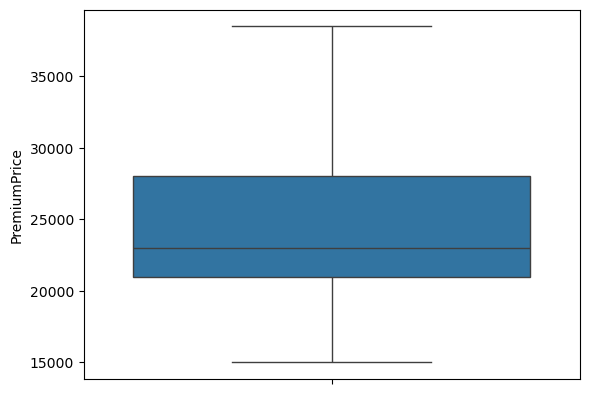

In [29]:
sns.boxplot(data=med_df['PremiumPrice'])
plt.show()

In [33]:
# c) data scaling
cols=med_df.columns
scale=StandardScaler()
df_scaled=scale.fit_transform(med_df)
df_scaled=pd.DataFrame(df_scaled,columns=cols)
df_scaled

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,0.233197,-0.850750,-0.938978,0.0,0.0,-1.306105,-1.425307,0.0,0.0,-0.908200,0.107023
1,1.307981,1.175433,-0.938978,0.0,0.0,1.170852,-0.276146,0.0,0.0,-0.908200,0.748509
2,-0.411674,1.175433,1.064988,0.0,0.0,-1.008870,-1.281662,0.0,0.0,0.469470,-0.213720
3,0.734763,1.175433,1.064988,0.0,0.0,1.468086,1.160307,0.0,0.0,1.847140,0.588137
4,-0.268369,-0.850750,-0.938978,0.0,0.0,-0.216244,0.801194,0.0,0.0,0.469470,-0.213720
...,...,...,...,...,...,...,...,...,...,...,...
981,-1.701415,-0.850750,-0.938978,0.0,0.0,0.080991,-0.707081,0.0,0.0,-0.908200,-1.496692
982,1.594590,1.175433,1.064988,0.0,0.0,-1.504261,-0.491613,0.0,0.0,2.535975,0.588137
983,1.021372,-0.850750,1.064988,0.0,0.0,-1.306105,-0.419791,0.0,0.0,0.469470,0.748509
984,0.376502,1.175433,1.064988,0.0,0.0,-1.008870,-0.276146,0.0,0.0,0.469470,2.272038


In [35]:
# d) correlation cut off
df_scaled.corr()>0.7
# no feature has correalion factor above 0.7 cut off 

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,True,False,False,False,False,False,False,False,False,False,False
Diabetes,False,True,False,False,False,False,False,False,False,False,False
BloodPressureProblems,False,False,True,False,False,False,False,False,False,False,False
AnyTransplants,False,False,False,False,False,False,False,False,False,False,False
AnyChronicDiseases,False,False,False,False,False,False,False,False,False,False,False
Height,False,False,False,False,False,True,False,False,False,False,False
Weight,False,False,False,False,False,False,True,False,False,False,False
KnownAllergies,False,False,False,False,False,False,False,False,False,False,False
HistoryOfCancerInFamily,False,False,False,False,False,False,False,False,False,False,False
NumberOfMajorSurgeries,False,False,False,False,False,False,False,False,False,True,False


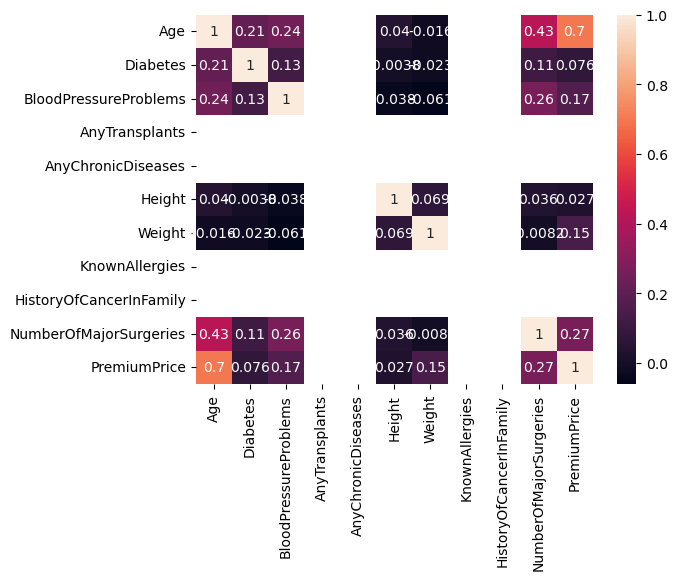

In [53]:
sns.heatmap(df_scaled.corr(),annot=True)
plt.show()

In [43]:
col_to_drop=['AnyTransplants','AnyChronicDiseases','KnownAllergies','HistoryOfCancerInFamily']
df_sc=df_scaled.drop(col_to_drop,axis=1)
df_sc

,Age,Diabetes,BloodPressureProblems,Height,Weight,NumberOfMajorSurgeries,PremiumPrice
0,0.233197,-0.850750,-0.938978,-1.306105,-1.425307,-0.908200,0.107023
1,1.307981,1.175433,-0.938978,1.170852,-0.276146,-0.908200,0.748509
2,-0.411674,1.175433,1.064988,-1.008870,-1.281662,0.469470,-0.213720
3,0.734763,1.175433,1.064988,1.468086,1.160307,1.847140,0.588137
4,-0.268369,-0.850750,-0.938978,-0.216244,0.801194,0.469470,-0.213720
...,...,...,...,...,...,...,...
981,-1.701415,-0.850750,-0.938978,0.080991,-0.707081,-0.908200,-1.496692
982,1.594590,1.175433,1.064988,-1.504261,-0.491613,2.535975,0.588137
983,1.021372,-0.850750,1.064988,-1.306105,-0.419791,0.469470,0.748509
984,0.376502,1.175433,1.064988,-1.008870,-0.276146,0.469470,2.272038


In [45]:
cr=df_sc.corr()
cr.style.background_gradient(cmap='coolwarm')

,Age,Diabetes,BloodPressureProblems,Height,Weight,NumberOfMajorSurgeries,PremiumPrice
Age,1.000000,0.210908,0.244888,0.039879,-0.016143,0.425334,0.698625
Diabetes,0.210908,1.000000,0.127727,-0.003783,-0.022546,0.114881,0.076220
BloodPressureProblems,0.244888,0.127727,1.000000,-0.037926,-0.060624,0.263021,0.166821
Height,0.039879,-0.003783,-0.037926,1.000000,0.068576,0.036455,0.027389
Weight,-0.016143,-0.022546,-0.060624,0.068576,1.000000,-0.008243,0.145397
NumberOfMajorSurgeries,0.425334,0.114881,0.263021,0.036455,-0.008243,1.000000,0.266039
PremiumPrice,0.698625,0.076220,0.166821,0.027389,0.145397,0.266039,1.000000


In [49]:
# e) correlation of target variable with features
df_sc.corr()[['PremiumPrice']].sort_values('PremiumPrice',ascending=False)

,PremiumPrice
PremiumPrice,1.000000
Age,0.698625
NumberOfMajorSurgeries,0.266039
BloodPressureProblems,0.166821
Weight,0.145397
Diabetes,0.076220
Height,0.027389


There is no strong correlation between independent features.
Premium price (target variable) has maximum correlation with age, followed by number of major surgeries and then by blood pressure problems

#### Task3

Age with premium price

In [58]:
# 1 feature (Age) model building
X1 = np.array(df_sc['Age']).reshape(-1,1)
y1=np.array(df_sc['PremiumPrice'])

In [64]:
# Data splitting, training and predicting the model
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.3,random_state=200)
mult_model1=LinearRegression().fit(X_train1,y_train1)
y_pred1=mult_model1.predict(X_test1)
print('Intercept_1:',mult_model1.intercept_)
print('slope_1:',mult_model1.coef_)

Intercept_1: 0.004086335521197379
slope_1: [0.70977914]


In [66]:
# evaluate
Mse_1=mean_squared_error(y_test1,y_pred1)
print('MSE 1 feature:',Mse_1)
Mae_1=mean_absolute_error(y_test1,y_pred1)
print('MAE for 1 feature:',Mae_1)
Rmse_1=mean_squared_error(y_test1,y_pred1,squared=False)
print('RMSE for 1 feature:',Rmse_1)
R2_1=r2_score(y_test1,y_pred1)
print('R2 score for 1 feature:',R2_1)

MSE 1 feature: 0.4597280478570593
MAE for 1 feature: 0.48604517776268075
RMSE for 1 feature: 0.6780324828922721
R2 score for 1 feature: 0.49621708901900863


In [83]:
list1=[]
list1.append(Mse_1)
list1.append(Mae_1)
list1.append(Rmse_1)
list1.append(R2_1)
list1

[0.4597280478570593,
 0.48604517776268075,
 0.6780324828922721,
 0.49621708901900863]

Age, number of major surgeries with premium price

In [69]:
# 2 feature (number of major surgeries) model building
X2 = np.array(df_sc[['Age','NumberOfMajorSurgeries']]).reshape(-1,2)
y2=np.array(df_sc['PremiumPrice'])

In [71]:
# Data splitting, training and predicting the model
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.3,random_state=200)
mult_model2=LinearRegression().fit(X_train2,y_train2)
y_pred2=mult_model2.predict(X_test2)
print('Intercept_2:',mult_model2.intercept_)
print('slope_2:',mult_model2.coef_)

Intercept_2: 0.003581947768936297
slope_2: [ 0.73855446 -0.06643361]


In [75]:
# evaluate
Mse_2=mean_squared_error(y_test2,y_pred2)
print('MSE for 2 features:',Mse_2)
Mae_2=mean_absolute_error(y_test2,y_pred2)
print('MAE for 2 features:',Mae_2)
Rmse_2=mean_squared_error(y_test2,y_pred2,squared=False)
print('RMSE for 1 feature:',Rmse_2)
R2_2=r2_score(y_test2,y_pred2)
print('R2 score for 2 features:',R2_2)

MSE for 2 features: 0.46634729824545307
MAE for 2 features: 0.4895308957807852
RMSE for 1 feature: 0.682896257308131
R2 score for 2 features: 0.48896352847441926


In [85]:
list2=[]
list2.append(Mse_2)
list2.append(Mae_2)
list2.append(Rmse_2)
list2.append(R2_2)
list2

[0.46634729824545307,
 0.4895308957807852,
 0.682896257308131,
 0.48896352847441926]

Age, number of major surgeries, blood pressure problems with premium price

In [77]:
# 1 feature model building
X3 = np.array(df_sc[['Age','NumberOfMajorSurgeries','BloodPressureProblems']]).reshape(-1,3)
y3=np.array(df_sc['PremiumPrice'])

In [79]:
# Data splitting, training and predicting the model
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y3,test_size=0.3,random_state=200)
mult_model3=LinearRegression().fit(X_train3,y_train3)
y_pred3=mult_model3.predict(X_test3)
print('Intercept_3:',mult_model3.intercept_)
print('slope_3:',mult_model3.coef_)

Intercept_3: 0.003563691928372626
slope_3: [ 0.74117245 -0.06341628 -0.01489964]


In [81]:
# evaluate
Mse_3=mean_squared_error(y_test3,y_pred3)
print('MSE for 3 features:',Mse_3)
Mae_3=mean_absolute_error(y_test3,y_pred3)
print('MAE for 3 features:',Mae_3)
Rmse_3=mean_squared_error(y_test3,y_pred3,squared=False)
print('RMSE for 3 features:',Rmse_3)
R2_3=r2_score(y_test3,y_pred3)
print('R2 score for 3 features:',R2_3)

MSE for 3 features: 0.46765967894766297
MAE for 3 features: 0.4899045475769894
RMSE for 3 features: 0.6838564754008424
R2 score for 3 features: 0.48752538482937413


In [87]:
list3=[]
list3.append(Mse_3)
list3.append(Mae_3)
list3.append(Rmse_3)
list3.append(R2_3)
list3

[0.46765967894766297,
 0.4899045475769894,
 0.6838564754008424,
 0.48752538482937413]

#### Task4

In [89]:
name=['Mse','Mae','Rmse','R2_score']
met=pd.DataFrame({'Metric':name,'Model1':list1,'Model2':list2,'Model3':list3})
met

,Metric,Model1,Model2,Model3
0,Mse,0.459728,0.466347,0.467660
1,Mae,0.486045,0.489531,0.489905
2,Rmse,0.678032,0.682896,0.683856
3,R2_score,0.496217,0.488964,0.487525


Model1 having one feature ( Age) is better compared to models with multi features.
comparitively model 1 involving age feature performs better than other models.

#### Task5

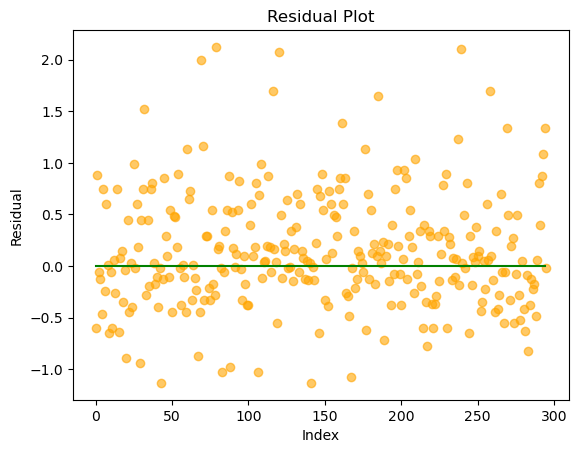

In [102]:
# Residual plot
df_results=pd.DataFrame({'Actual':y_test1,'Predicted':mult_model1.predict(X_test1)})
df_results['Residual']=abs(df_results['Actual'])-abs(df_results['Predicted'])
plt.scatter(x=df_results.index,y=df_results.Residual,alpha=0.6,color='orange')
plt.plot(np.repeat(0,df_results.index.max()),color='green')
plt.title("Residual Plot")
plt.xlabel("Index")
plt.ylabel("Residual")
plt.show()

Interpretation: There is even spread of errors around zero line. There is some homoscedasticity 

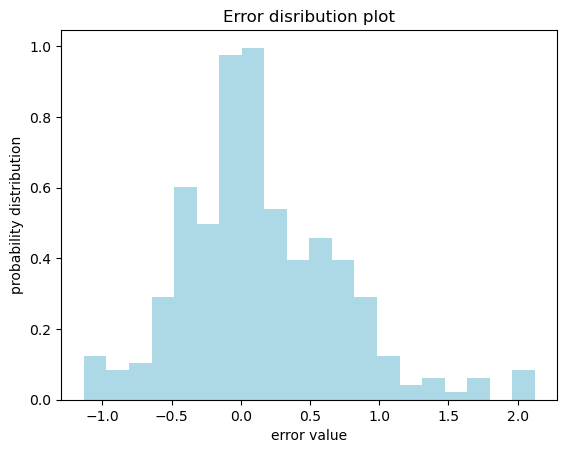

In [107]:
# error distribution plot
plt.hist(df_results.Residual,bins=20,density=True,color='lightblue')
plt.xlabel('error value')
plt.ylabel('probability distribution')
plt.title('Error disribution plot')
plt.show()

Interpretation: Error normality curve shows normality in nature with lightly right skewed

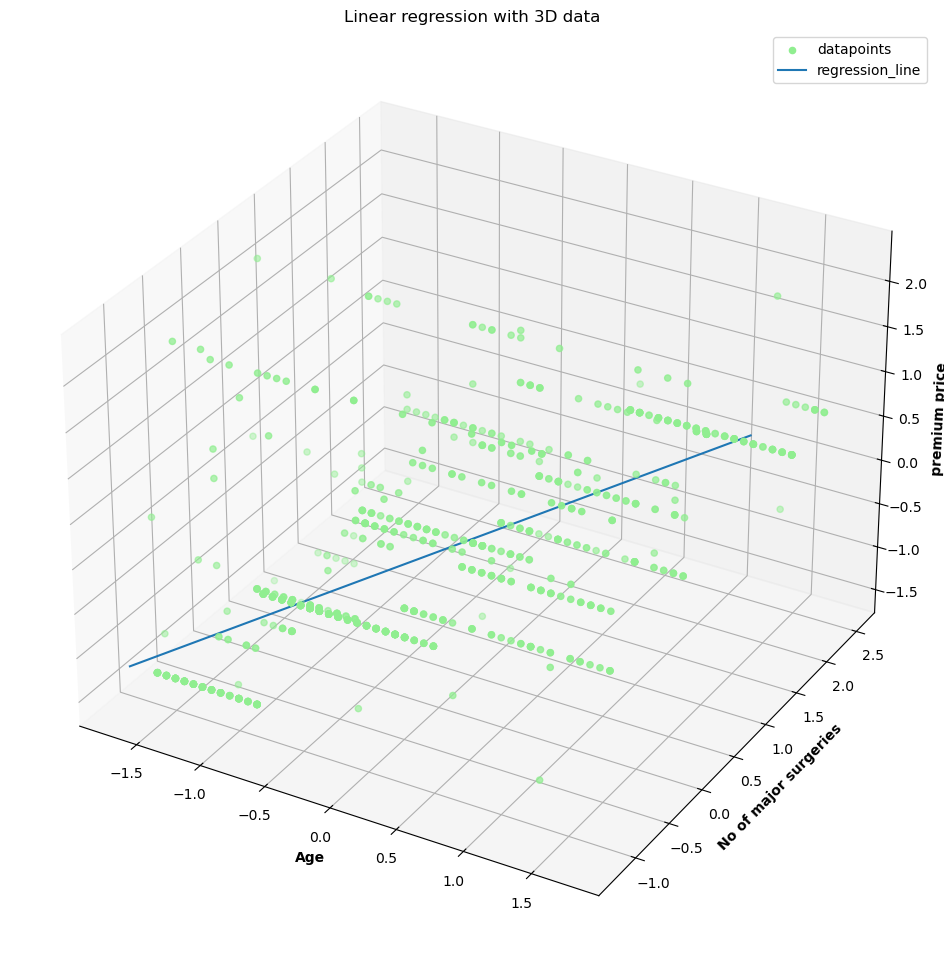

In [155]:
X2=df_sc[['Age','NumberOfMajorSurgeries']].values.reshape(-1,2)
Y=df_sc['PremiumPrice']
x=X2[:,0]
y=X2[:,1]
z=Y
x1_line=np.arange(min(x),max(x),0.1)
x2_line=np.array([mult_model2.coef_[0]*val+(-mult_model2.intercept_+mult_model2.coef_[1]*np.mean(y))for val in x1_line])
y_line=mult_model2.coef_[0]*x1_line + mult_model2.coef_[1]*x2_line + mult_model2.intercept_
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter3D(x,y,z,color='lightgreen',label='datapoints')
# plor reg line
ax.plot(x1_line,x2_line,y_line,label='regression_line')
ax.set_xlabel('Age',fontweight='bold')
ax.set_ylabel('No of major surgeries',fontweight='bold')
#plt.xlim(-2,1.5)
ax.set_zlabel('premium price',fontweight='bold')
ax.set_title('Linear regression with 3D data')
ax.legend()
plt.show()

#### Task6

Overall interpretation:
Mse = 0.49: lower Mse compare to rest models, as number of feature increases Mse gets increased affecting the model performance
Mae = 0.486 : all model has similar Mae comparitively the selected model(1 feature) has low Mae
Rmse = 0.678 : the rmse is lower compared to other models, signifying the decrease in the average magnitude of error
r2 score = 0.496 : this value is higher compared to other models. the selected model explains around 50% of variance in the premium price based on age. 
This represents the better performance for linear regression model than multi linear regression model. Error has only increased and r2 score gets decreased as the number of feature increased.
hence, linear regression model is performing better than multi linear regression model.

Final Equation:
y = 0.004 + 0.709 X